# Eksplorasi Data dan Validasi Konsistensi

Notebook ini bertujuan untuk:
1. Memuat dan memahami struktur kedua dataset (2024 dan 2016)
2. Melakukan EDA terfokus pada 12 kolom yang sama
3. Memvalidasi konsistensi data antara kedua periode
4. Mengidentifikasi potensi temporal drift

In [23]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Setup
import sys
sys.path.append('..')
from src import RAW_DATA_DIR

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

## 1. Load Data

In [24]:
# Load 2024 data
data_2024_path = RAW_DATA_DIR / 'DATA TS SARJANA 2024.csv'
df_2024 = pd.read_csv(data_2024_path)
print(f"Data 2024 shape: {df_2024.shape}")
print(f"Columns: {df_2024.shape[1]}")
print(f"Rows: {df_2024.shape[0]}")

Data 2024 shape: (2336, 12)
Columns: 12
Rows: 2336


In [25]:
# Load 2016 data
data_2016_path = RAW_DATA_DIR / 'DATA TS SARJANA 2023.csv'
df_2016 = pd.read_csv(data_2016_path)
print(f"Data 2016 shape: {df_2016.shape}")
print(f"Columns: {df_2016.shape[1]}")
print(f"Rows: {df_2016.shape[0]}")

Data 2016 shape: (2422, 12)
Columns: 12
Rows: 2422


## 2. Identifikasi Kolom yang Sama

In [26]:
# Get column names
cols_2024 = set(df_2024.columns)
cols_2016 = set(df_2016.columns)

# Find common columns
common_columns = list(cols_2024.intersection(cols_2016))
print(f"\nJumlah kolom yang sama: {len(common_columns)}")
print("\nKolom yang sama:")
for i, col in enumerate(sorted(common_columns), 1):
    print(f"{i}. {col}")


Jumlah kolom yang sama: 12

Kolom yang sama:
1. Apakah pekerjaan yang Anda lakukan di tempat bekerja sesuai dengan bidang keilmuan?
2. Bidang usaha bekerja
3. IP
4. Jelaskan tugas-tugas utama dalam pekerjaan Anda saat ini?
5. NIM
6. Organisasi apa yang paling aktif Anda ikuti selama menjalani perkuliahan? (nama organisasi)
7. Program Studi
8. Seberapa besar program studi Anda bermanfaat untuk hal-hal di bawah ini? [memulai pekerjaan]
9. Seberapa besar program studi Anda bermanfaat untuk hal-hal di bawah ini? [pembelajaran yang berkelanjutan dalam pekerjaan]
10. Seberapa erat hubungan bidang studi dengan pekerjaan Anda?
11. Sebutkan jenis kegiatan di organisasi yang aktif diikuti yang membantu mengasah kemampuan/skill Anda!
12. Sebutkan kategori jenis pekerjaan yang Anda lakukan di tempat bekerja!


In [27]:
# Kolom unik di masing-masing dataset
unique_2024 = cols_2024 - cols_2016
unique_2016 = cols_2016 - cols_2024

print(f"\nKolom unik di 2024: {len(unique_2024)}")
print(f"Kolom unik di 2016: {len(unique_2016)}")


Kolom unik di 2024: 0
Kolom unik di 2016: 0


## 3. Analisis Kolom Target

In [28]:
# Identifikasi kolom target
# Asumsi: kolom target adalah 'Lulus_label' atau yang serupa
target_candidates = [col for col in common_columns if 'Apakah pekerjaan yang Anda lakukan di tempat bekerja sesuai dengan bidang keilmuan?']
print("Kandidat kolom target:")
for col in target_candidates:
    print(f"- {col}")
    if col in df_2024.columns:
        print(f"  2024: {df_2024[col].value_counts().to_dict()}")
    if col in df_2016.columns:
        print(f"  2016: {df_2016[col].value_counts().to_dict()}")

Kandidat kolom target:
- NIM
  2024: {17517001: 1, 11917029: 1, 12517001: 1, 13117211: 1, 13417115: 1, 10717049: 1, 11417019: 1, 15317037: 1, 11517015: 1, 13117069: 1, 15117055: 1, 13617010: 1, 13417066: 1, 12217059: 1, 10617019: 1, 19017192: 1, 14517010: 1, 15117052: 1, 10617058: 1, 19217078: 1, 15217014: 1, 15217050: 1, 19017173: 1, 11217009: 1, 15117100: 1, 10217015: 1, 12017001: 1, 13617017: 1, 12517014: 1, 15117086: 1, 12017071: 1, 10717208: 1, 13717013: 1, 13117204: 1, 15517076: 1, 12117051: 1, 13117055: 1, 17217022: 1, 13717059: 1, 15417084: 1, 15017004: 1, 17517002: 1, 15717026: 1, 14417014: 1, 15017058: 1, 18017039: 1, 12117001: 1, 12117058: 1, 18117028: 1, 15017033: 1, 18317003: 1, 10317037: 1, 10517044: 1, 19017317: 1, 13517091: 1, 13717060: 1, 13417043: 1, 11217032: 1, 11217029: 1, 15017091: 1, 10117074: 1, 13417046: 1, 10217060: 1, 13517013: 1, 19217001: 1, 12917036: 1, 13017017: 1, 12217013: 1, 12017014: 1, 15417064: 1, 13217009: 1, 15317055: 1, 15017112: 1, 12917004: 1, 

## 4. EDA pada 12 Kolom yang Sama

In [29]:
# Create subset dataframes with common columns
df_2024_common = df_2024[common_columns].copy()
df_2016_common = df_2016[common_columns].copy()

print(f"Shape data 2024 (common cols): {df_2024_common.shape}")
print(f"Shape data 2016 (common cols): {df_2016_common.shape}")

Shape data 2024 (common cols): (2336, 12)
Shape data 2016 (common cols): (2422, 12)


In [30]:
# Basic info untuk kedua dataset
print("=== Data Types Comparison ===")
dtype_comparison = pd.DataFrame({
    '2024': df_2024_common.dtypes,
    '2016': df_2016_common.dtypes
})
dtype_comparison['Match'] = dtype_comparison['2024'] == dtype_comparison['2016']
print(dtype_comparison)

=== Data Types Comparison ===
                                                       2024     2016  Match
NIM                                                   int64    int64   True
Seberapa erat hubungan bidang studi dengan peke...   object   object   True
Bidang usaha bekerja                                 object   object   True
Sebutkan kategori jenis pekerjaan yang Anda lak...   object   object   True
Jelaskan tugas-tugas utama dalam pekerjaan Anda...   object   object   True
Sebutkan jenis kegiatan di organisasi yang akti...   object   object   True
Seberapa besar program studi Anda bermanfaat un...    int64    int64   True
IP                                                  float64  float64   True
Program Studi                                        object   object   True
Organisasi apa yang paling aktif Anda ikuti sel...   object   object   True
Apakah pekerjaan yang Anda lakukan di tempat be...   object   object   True
Seberapa besar program studi Anda bermanfaat un...    int6

In [31]:
# Missing values analysis
missing_comparison = pd.DataFrame({
    '2024_missing': df_2024_common.isnull().sum(),
    '2024_missing_pct': (df_2024_common.isnull().sum() / len(df_2024_common) * 100).round(2),
    '2016_missing': df_2016_common.isnull().sum(),
    '2016_missing_pct': (df_2016_common.isnull().sum() / len(df_2016_common) * 100).round(2)
})
print("\n=== Missing Values Comparison ===")
print(missing_comparison[missing_comparison[['2024_missing', '2016_missing']].sum(axis=1) > 0])


=== Missing Values Comparison ===
                                                    2024_missing  \
Seberapa erat hubungan bidang studi dengan peke...           121   
Bidang usaha bekerja                                          77   
Sebutkan kategori jenis pekerjaan yang Anda lak...           119   
Jelaskan tugas-tugas utama dalam pekerjaan Anda...           324   
Sebutkan jenis kegiatan di organisasi yang akti...           109   
IP                                                             1   
Organisasi apa yang paling aktif Anda ikuti sel...            28   
Apakah pekerjaan yang Anda lakukan di tempat be...            80   

                                                    2024_missing_pct  \
Seberapa erat hubungan bidang studi dengan peke...              5.18   
Bidang usaha bekerja                                            3.30   
Sebutkan kategori jenis pekerjaan yang Anda lak...              5.09   
Jelaskan tugas-tugas utama dalam pekerjaan Anda...             1

## 5. Analisis Distribusi untuk Validasi Konsistensi

In [32]:
# Separate numerical and categorical columns
numerical_cols = df_2024_common.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df_2024_common.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")
print(f"\nCategorical columns ({len(categorical_cols)}): {categorical_cols}")

Numerical columns (4): ['NIM', 'Seberapa besar program studi Anda bermanfaat untuk hal-hal di bawah ini? [memulai pekerjaan]', 'IP', 'Seberapa besar program studi Anda bermanfaat untuk hal-hal di bawah ini? [pembelajaran yang berkelanjutan dalam pekerjaan]']

Categorical columns (8): ['Seberapa erat hubungan bidang studi dengan pekerjaan Anda?', 'Bidang usaha bekerja', 'Sebutkan kategori jenis pekerjaan yang Anda lakukan di tempat bekerja!', 'Jelaskan tugas-tugas utama dalam pekerjaan Anda saat ini?', 'Sebutkan jenis kegiatan di organisasi yang aktif diikuti yang membantu mengasah kemampuan/skill Anda!', 'Program Studi', 'Organisasi apa yang paling aktif Anda ikuti selama menjalani perkuliahan? (nama organisasi)', 'Apakah pekerjaan yang Anda lakukan di tempat bekerja sesuai dengan bidang keilmuan?']


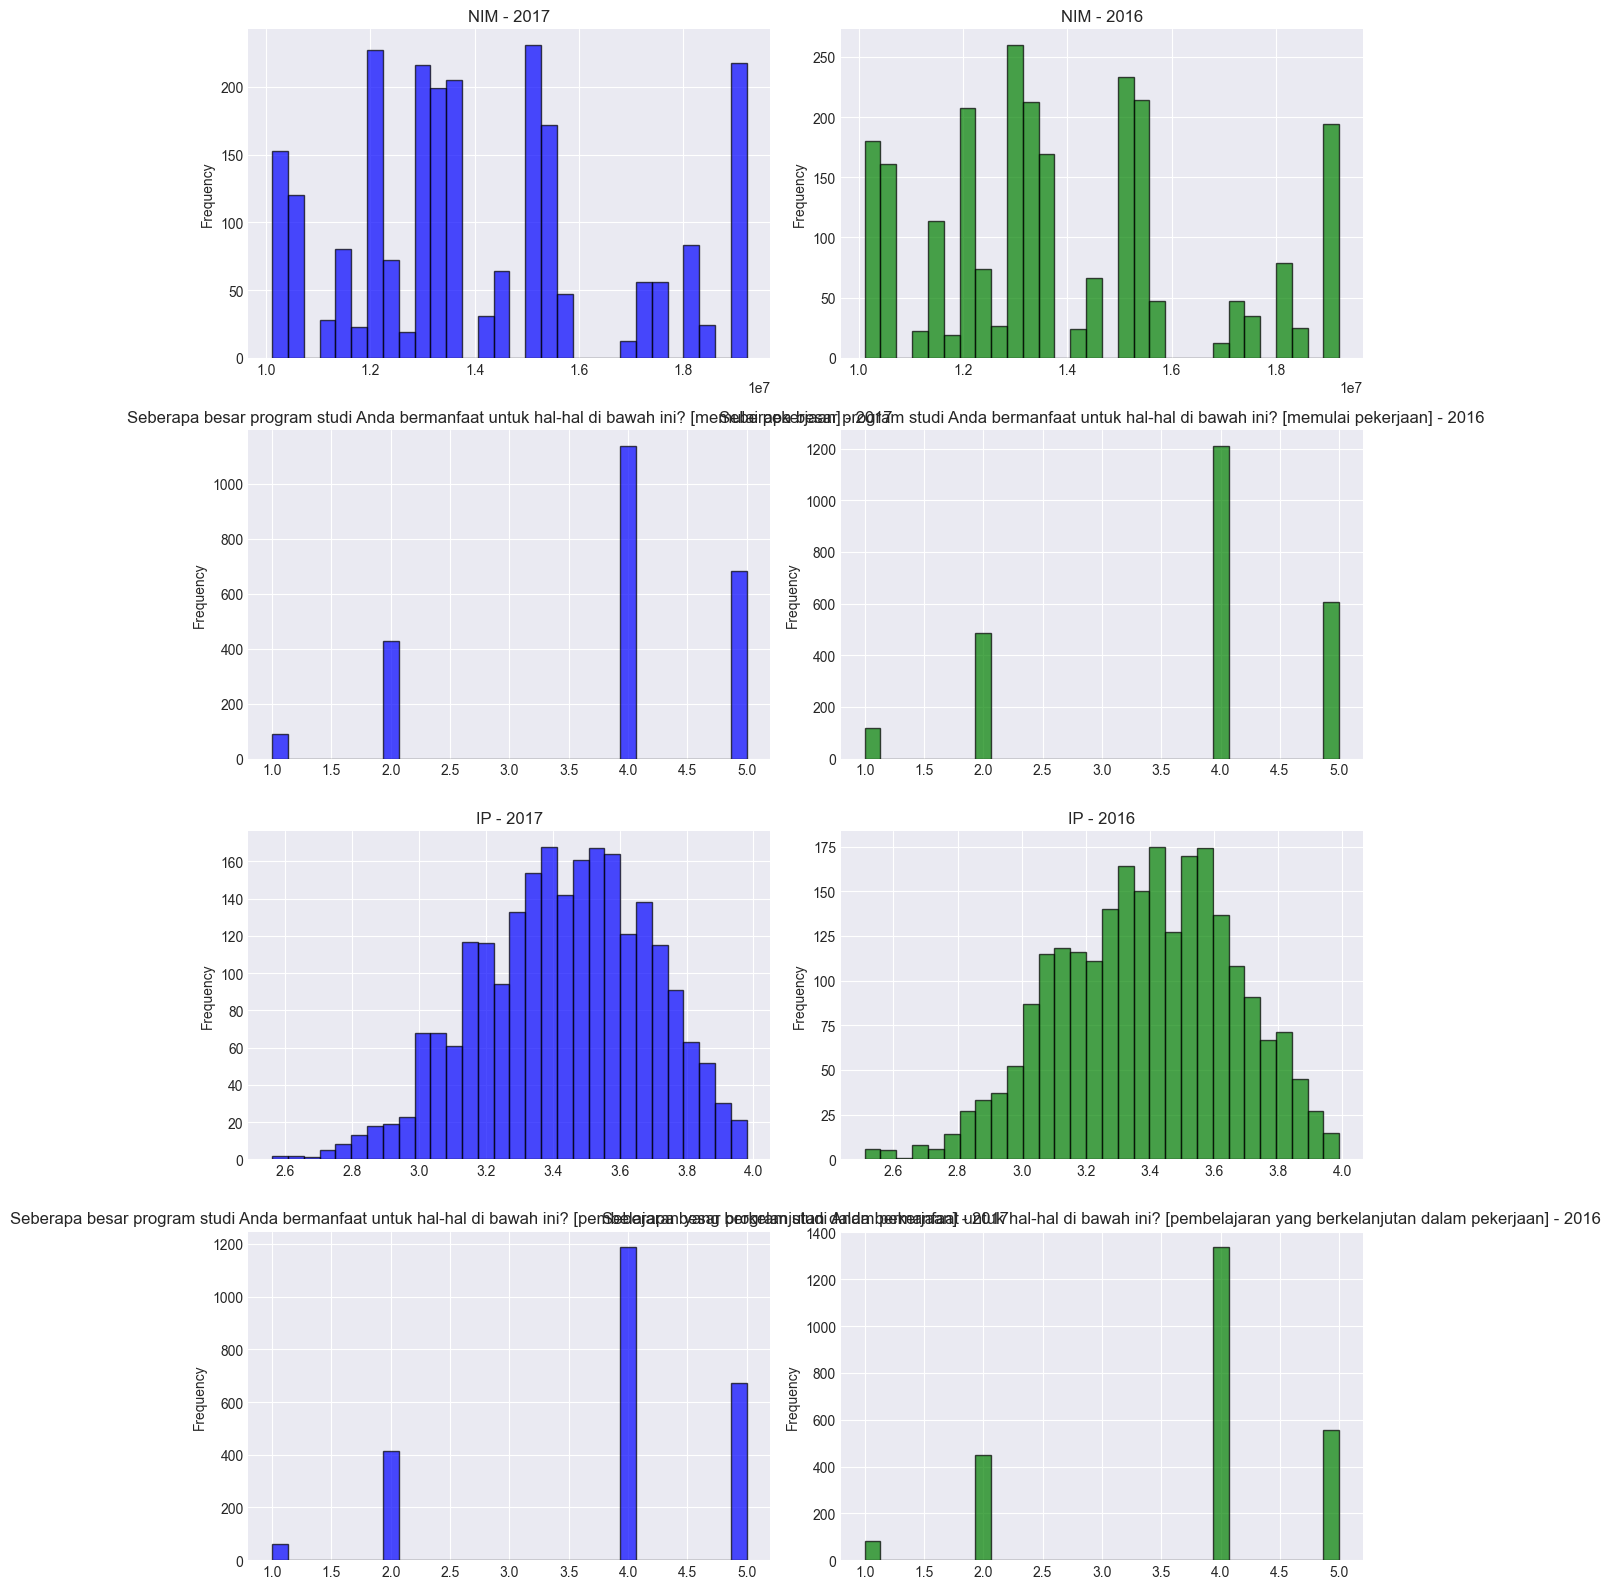

In [33]:
# Analisis distribusi numerical features
if numerical_cols:
    fig, axes = plt.subplots(len(numerical_cols), 2, figsize=(12, 4*len(numerical_cols)))
    if len(numerical_cols) == 1:
        axes = axes.reshape(1, -1)
    
    for idx, col in enumerate(numerical_cols):
        # 2024 data
        df_2024_common[col].hist(ax=axes[idx, 0], bins=30, alpha=0.7, color='blue', edgecolor='black')
        axes[idx, 0].set_title(f'{col} - 2017')
        axes[idx, 0].set_ylabel('Frequency')
        
        # 2016 data
        df_2016_common[col].hist(ax=axes[idx, 1], bins=30, alpha=0.7, color='green', edgecolor='black')
        axes[idx, 1].set_title(f'{col} - 2016')
        axes[idx, 1].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

In [34]:
# Statistical comparison for numerical features
if numerical_cols:
    print("\n=== Statistical Comparison for Numerical Features ===")
    for col in numerical_cols:
        print(f"\n{col}:")
        print(f"  2024 - Mean: {df_2024_common[col].mean():.2f}, Std: {df_2024_common[col].std():.2f}, Median: {df_2024_common[col].median():.2f}")
        print(f"  2016 - Mean: {df_2016_common[col].mean():.2f}, Std: {df_2016_common[col].std():.2f}, Median: {df_2016_common[col].median():.2f}")


=== Statistical Comparison for Numerical Features ===

NIM:
  2024 - Mean: 14118941.63, Std: 2558043.03, Median: 13517040.50
  2016 - Mean: 13918412.64, Std: 2516367.96, Median: 13416037.00

Seberapa besar program studi Anda bermanfaat untuk hal-hal di bawah ini? [memulai pekerjaan]:
  2024 - Mean: 3.81, Std: 1.15, Median: 4.00
  2016 - Mean: 3.70, Std: 1.18, Median: 4.00

IP:
  2024 - Mean: 3.43, Std: 0.25, Median: 3.44
  2016 - Mean: 3.39, Std: 0.27, Median: 3.40

Seberapa besar program studi Anda bermanfaat untuk hal-hal di bawah ini? [pembelajaran yang berkelanjutan dalam pekerjaan]:
  2024 - Mean: 3.85, Std: 1.10, Median: 4.00
  2016 - Mean: 3.76, Std: 1.10, Median: 4.00


In [35]:
# Analisis categorical features
print("\n=== Categorical Features Value Counts Comparison ===")
for col in categorical_cols[:5]:  # Limit to first 5 for readability
    print(f"\n{col}:")
    print("2024:")
    print(df_2024_common[col].value_counts().head())
    print("\n2016:")
    print(df_2016_common[col].value_counts().head())
    print("-" * 50)


=== Categorical Features Value Counts Comparison ===

Seberapa erat hubungan bidang studi dengan pekerjaan Anda?:
2024:
Seberapa erat hubungan bidang studi dengan pekerjaan Anda?
sangat erat          739
erat                 575
kurang erat          393
cukup erat           272
tidak sama sekali    236
Name: count, dtype: int64

2016:
Seberapa erat hubungan bidang studi dengan pekerjaan Anda?
item1    539
item3    459
item4    316
item2    301
item5    265
Name: count, dtype: int64
--------------------------------------------------

Bidang usaha bekerja:
2024:
Bidang usaha bekerja
J    311
B    280
C    267
K    235
S    219
Name: count, dtype: int64

2016:
Bidang usaha bekerja
J    297
K    272
C    254
S    225
B    223
Name: count, dtype: int64
--------------------------------------------------

Sebutkan kategori jenis pekerjaan yang Anda lakukan di tempat bekerja!:
2024:
Sebutkan kategori jenis pekerjaan yang Anda lakukan di tempat bekerja!
Teknologi Informasi     314
Manajemen da

## 6. Deteksi Temporal Drift

In [36]:
# Function to detect value differences in categorical features
def compare_categorical_values(col, df1, df2, label1='2024', label2='2016'):
    values1 = set(df1[col].dropna().unique())
    values2 = set(df2[col].dropna().unique())
    
    only_in_1 = values1 - values2
    only_in_2 = values2 - values1
    common = values1.intersection(values2)
    
    return {
        f'only_in_{label1}': only_in_1,
        f'only_in_{label2}': only_in_2,
        'common_values': common,
        'drift_detected': len(only_in_1) > 0 or len(only_in_2) > 0
    }

In [37]:
# Check for temporal drift in categorical features
print("=== Temporal Drift Analysis for Categorical Features ===")
drift_summary = []

for col in categorical_cols:
    comparison = compare_categorical_values(col, df_2024_common, df_2016_common)
    
    if comparison['drift_detected']:
        print(f"\n{col}: DRIFT DETECTED")
        if comparison['only_in_2024']:
            print(f"  Values only in 2024: {list(comparison['only_in_2024'])[:5]}...")
        if comparison['only_in_2016']:
            print(f"  Values only in 2016: {list(comparison['only_in_2016'])[:5]}...")
        drift_summary.append(col)

print(f"\n\nTotal features with drift: {len(drift_summary)}/{len(categorical_cols)}")

=== Temporal Drift Analysis for Categorical Features ===

Seberapa erat hubungan bidang studi dengan pekerjaan Anda?: DRIFT DETECTED
  Values only in 2016: ['item4', 'item2', 'item3', 'item5', 'item1']...

Sebutkan kategori jenis pekerjaan yang Anda lakukan di tempat bekerja!: DRIFT DETECTED
  Values only in 2024: ['Pengendalian Kualitas', 'produksi', 'Kesenian dan Desain', 'Perdagangan', 'Lingkungan']...
  Values only in 2016: ['Analis Keuangan', 'Analis Kebijakan (PNS)', 'Pengolahan dan pelaporan data', 'Product development ', 'Project Managing']...

Jelaskan tugas-tugas utama dalam pekerjaan Anda saat ini?: DRIFT DETECTED
  Values only in 2024: ['Global Analyst Program Bank Negara Indonesia. Kami dilatih selama 1 tahun kedepan mengenai dasardasar perbankan dan segala hal yang harus diketahui melalui metode teori di kelas dan branch experience serta ujian untuk menguji kompetensi kami. Training dilakukan untuk menghasilkan tenaga kerja yang baik dan andal untuk disalurkan ke divisi t

In [38]:
# Distribution shift analysis for numerical features
from scipy import stats

if numerical_cols:
    print("\n=== Distribution Shift Analysis (KS Test) ===")
    ks_results = []
    
    for col in numerical_cols:
        # Remove NaN values
        data_2024 = df_2024_common[col].dropna()
        data_2016 = df_2016_common[col].dropna()
        
        if len(data_2024) > 0 and len(data_2016) > 0:
            ks_stat, p_value = stats.ks_2samp(data_2024, data_2016)
            ks_results.append({
                'feature': col,
                'ks_statistic': ks_stat,
                'p_value': p_value,
                'significant_shift': p_value < 0.05
            })
    
    ks_df = pd.DataFrame(ks_results)
    print(ks_df)


=== Distribution Shift Analysis (KS Test) ===
                                             feature  ks_statistic  p_value  \
0                                                NIM          0.09     0.00   
1  Seberapa besar program studi Anda bermanfaat u...          0.04     0.03   
2                                                 IP          0.07     0.00   
3  Seberapa besar program studi Anda bermanfaat u...          0.06     0.00   

   significant_shift  
0               True  
1               True  
2               True  
3               True  


## 7. Summary dan Rekomendasi

In [39]:
# Summary statistics
print("=== SUMMARY ===")
print(f"\n1. Data Overview:")
print(f"   - 2024 dataset: {df_2024.shape[0]} rows, {df_2024.shape[1]} columns")
print(f"   - 2016 dataset: {df_2016.shape[0]} rows, {df_2016.shape[1]} columns")
print(f"   - Common columns: {len(common_columns)}")

print(f"\n2. Data Quality:")
print(f"   - Features with missing values: {(missing_comparison[['2024_missing', '2016_missing']].sum(axis=1) > 0).sum()}")
print(f"   - Features with type mismatch: {(~dtype_comparison['Match']).sum()}")

print(f"\n3. Temporal Drift:")
print(f"   - Categorical features with drift: {len(drift_summary)}/{len(categorical_cols)}")
if numerical_cols and 'ks_df' in locals():
    print(f"   - Numerical features with significant distribution shift: {ks_df['significant_shift'].sum()}/{len(numerical_cols)}")

=== SUMMARY ===

1. Data Overview:
   - 2024 dataset: 2336 rows, 12 columns
   - 2016 dataset: 2422 rows, 12 columns
   - Common columns: 12

2. Data Quality:
   - Features with missing values: 8
   - Features with type mismatch: 0

3. Temporal Drift:
   - Categorical features with drift: 5/8
   - Numerical features with significant distribution shift: 4/4


In [40]:
# Save common columns list for later use
import json

common_columns_info = {
    'common_columns': common_columns,
    'numerical_columns': numerical_cols,
    'categorical_columns': categorical_cols,
    'features_with_drift': drift_summary if 'drift_summary' in locals() else []
}

# Save to processed data directory
output_path = Path('..') / 'data' / '02_processed' / 'column_analysis.json'
with open(output_path, 'w') as f:
    json.dump(common_columns_info, f, indent=2)

print(f"\nColumn analysis saved to: {output_path}")


Column analysis saved to: ..\data\02_processed\column_analysis.json


## 8. Kesimpulan dan Langkah Selanjutnya

Berdasarkan analisis di atas:

1. **Konsistensi Data**: [Tulis temuan Anda tentang konsistensi antara kedua dataset]
2. **Temporal Drift**: [Tulis temuan tentang perubahan distribusi atau nilai antar periode]
3. **Rekomendasi Feature Engineering**: [Tulis rekomendasi untuk menangani drift]
4. **Strategi Modeling**: [Tulis strategi yang akan digunakan berdasarkan temuan]

Langkah selanjutnya:
- Implementasi feature engineering di `src/features/build_features.py`
- Pengembangan baseline models di notebook 02

## 9. Contoh Penggunaan Prediksi pada DATA TS SARJANA 2024

Setelah model dilatih, Anda dapat menggunakan `predict_model.py` yang telah dimodifikasi untuk melakukan prediksi pada DATA TS SARJANA 2024.

In [41]:
# Contoh 1: Menggunakan function predict_ts_sarjana_2024 (setelah model dilatih)
# Uncomment dan jalankan setelah model selesai dilatih

# import sys
# sys.path.append('..')
# from src.models.predict_model import predict_ts_sarjana_2024

# # Prediksi pada DATA TS SARJANA 2024 dan simpan hasil
# results = predict_ts_sarjana_2024(save_results=True)
# print(f"Prediksi selesai untuk {len(results)} data")

print("Kode di atas dapat dijalankan setelah model dilatih menggunakan train_models.py")

Kode di atas dapat dijalankan setelah model dilatih menggunakan train_models.py


In [42]:
# Contoh 2: Menggunakan Command Line Interface (CLI)
# Jalankan di terminal setelah model dilatih:

commands = [
    "# Prediksi pada DATA TS SARJANA 2024:",
    "python src/models/predict_model.py --predict-2024",
    "",
    "# Prediksi pada file custom:",
    "python src/models/predict_model.py --input 'data/01_raw/DATA TS SARJANA 2024.xlsx' --output 'results/my_predictions.csv'",
    "",
    "# Evaluasi jika data memiliki label target:",
    "python src/models/predict_model.py --input 'data/test.xlsx' --evaluate"
]

print("Command Line Interface yang dapat digunakan:")
for cmd in commands:
    print(cmd)

Command Line Interface yang dapat digunakan:
# Prediksi pada DATA TS SARJANA 2024:
python src/models/predict_model.py --predict-2024

# Prediksi pada file custom:
python src/models/predict_model.py --input 'data/01_raw/DATA TS SARJANA 2024.xlsx' --output 'results/my_predictions.csv'

# Evaluasi jika data memiliki label target:
python src/models/predict_model.py --input 'data/test.xlsx' --evaluate


### Output yang Dihasilkan

File hasil prediksi akan berisi:
- **Semua kolom asli** dari DATA TS SARJANA 2024
- **`prediction`**: Hasil prediksi (contoh: "ya"/"tidak" atau "sesuai"/"tidak sesuai")
- **`probability_class_0`**: Probabilitas untuk kelas 0
- **`probability_class_1`**: Probabilitas untuk kelas 1  
- **`confidence`**: Tingkat kepercayaan prediksi (nilai maksimum probabilitas)

### Lokasi File Output
- Hasil prediksi disimpan di: `data/02_processed/predictions_ts_sarjana_2024.csv`
- Evaluasi metrics (jika ada): `data/02_processed/evaluation_2024_ts_sarjana.json`